In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
warnings.filterwarnings('ignore')

seed = 42

## Data Import

In [2]:
# read CSV
df = pd.read_csv("SMS_data.csv")

# display first 10 records
df.head(n=10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
# view shape of data frame
df.shape

(5572, 2)

In [4]:
# describe data frame
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# check for nulls
df.isna().sum() 

Category    0
Message     0
dtype: int64

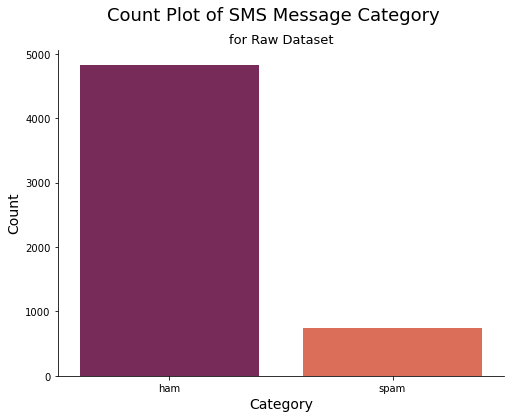

In [6]:
# set figure size
plt.figure(figsize=(8, 6))

# create count plot
sns.countplot(x=df.Category, palette="rocket")

# add title and axis labels
plt.suptitle("Count Plot of SMS Message Category", size=18)
plt.title("for Raw Dataset", size=13)
plt.ylabel("Count", size=14)
plt.xlabel("Category", size=14)

# remove top/right border
sns.despine()

# display plot
plt.show()

It was decided not to address the imbalanced classes in order to avoid loss of information.

## Test & Train Split

In [7]:
# split dataset into 33% test, 67% train
train, test = train_test_split(df, test_size=0.33, random_state=seed)

In [8]:
# view shape of training dataset
train.shape

(3733, 2)

In [9]:
# view shape of test dataset
test.shape

(1839, 2)

## Exploratory Data Analysis

### SMS Message Category Distribution

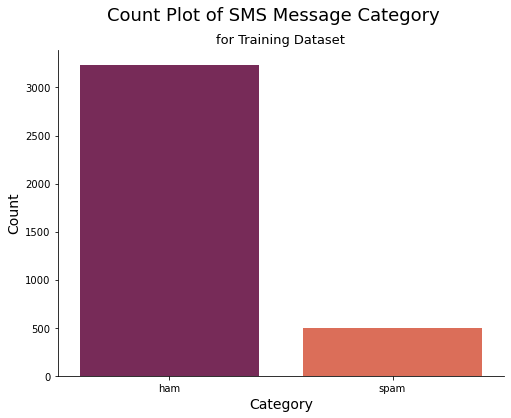

In [10]:
# set figure size
plt.figure(figsize=(8, 6))

# create count plot
sns.countplot(x=train.Category, palette="rocket")

# add title and axis labels
plt.suptitle("Count Plot of SMS Message Category", size=18)
plt.title("for Training Dataset", size=13)
plt.ylabel("Count", size=14)
plt.xlabel("Category", size=14)

# remove top/right border
sns.despine()

# display plot
plt.show()

### Character Count

In [11]:
# create new column for message length
train['num_chars']  = train['Message'].str.len()
test['num_chars']  = test['Message'].str.len()

# view training data
train.head()

,Category,Message,num_chars
3235,ham,Yup ü not comin :-(,19
945,ham,I sent my scores to sophas and i had to do sec...,221
5319,ham,Kothi print out marandratha.,28
5528,ham,Its just the effect of irritation. Just ignore it,49
247,ham,I asked you to call him now ok,30


In [12]:
train.num_chars.describe()

count    3733.000000
mean       81.079561
std        61.071386
min         2.000000
25%        36.000000
50%        62.000000
75%       123.000000
max       910.000000
Name: num_chars, dtype: float64

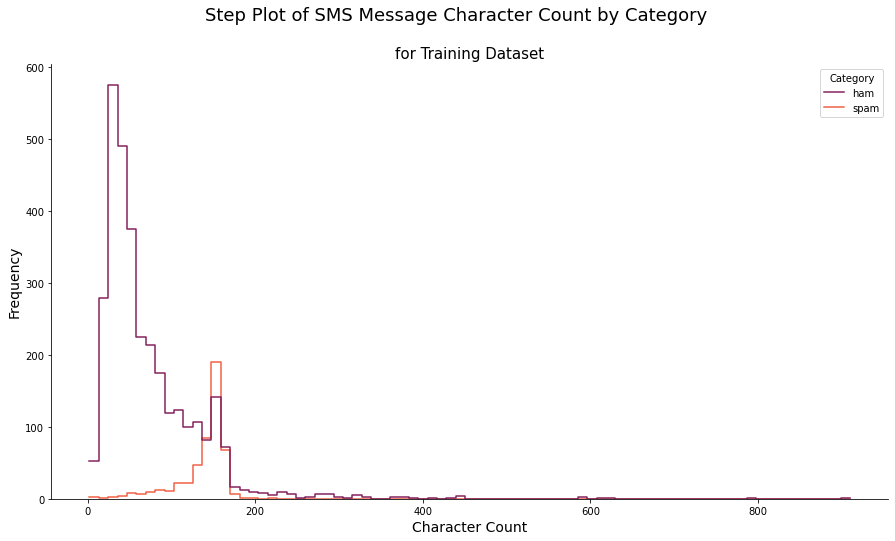

In [13]:
# set figure size
plt.figure(figsize=(15, 8))

# create hist plot
sns.histplot(data=train, x="num_chars", hue='Category', element="step", fill=False, palette="rocket")

# add title and axis labels
plt.suptitle("Step Plot of SMS Message Character Count by Category", size=18)
plt.title("for Training Dataset", size=15)
plt.ylabel("Frequency", size=14)
plt.xlabel("Character Count", size=14)

# remove top/right border
sns.despine()

# display plot
plt.show()

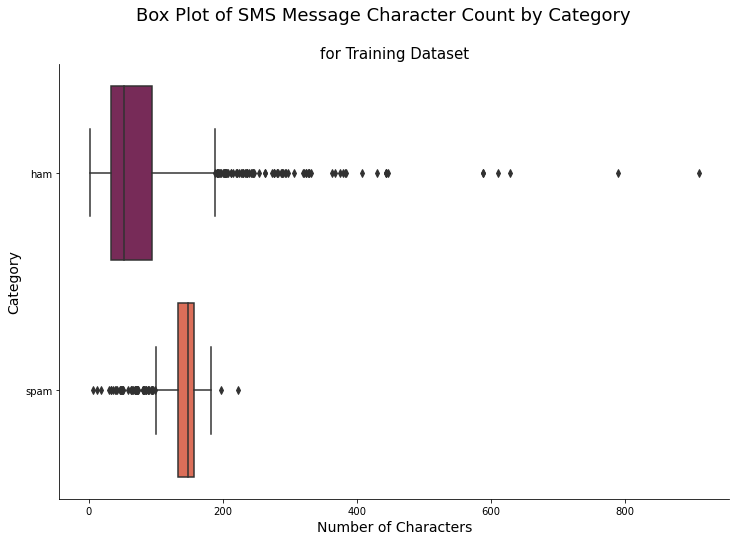

In [14]:
# set figure size
plt.figure(figsize=(12, 8))

# create box plot
sns.boxplot( x=train["num_chars"], y=train["Category"], palette="rocket" );

# add title and axis labels
plt.suptitle("Box Plot of SMS Message Character Count by Category", size=18)
plt.title("for Training Dataset", size=15)
plt.xlabel("Number of Characters", size=14)
plt.ylabel("Category", size=14)

# remove top/right border
sns.despine()

# display plot
plt.show()

### Word Count

In [15]:
train.head()

,Category,Message,num_chars
3235,ham,Yup ü not comin :-(,19
945,ham,I sent my scores to sophas and i had to do sec...,221
5319,ham,Kothi print out marandratha.,28
5528,ham,Its just the effect of irritation. Just ignore it,49
247,ham,I asked you to call him now ok,30


In [16]:
# calculate number of words
train['num_words'] = train['Message'].str.split().str.len()

# display data frame with new column
train.head()

,Category,Message,num_chars,num_words
3235,ham,Yup ü not comin :-(,19,5
945,ham,I sent my scores to sophas and i had to do sec...,221,43
5319,ham,Kothi print out marandratha.,28,4
5528,ham,Its just the effect of irritation. Just ignore it,49,9
247,ham,I asked you to call him now ok,30,8


In [17]:
train.num_words.describe()

count    3733.000000
mean       15.707742
std        11.609585
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: num_words, dtype: float64

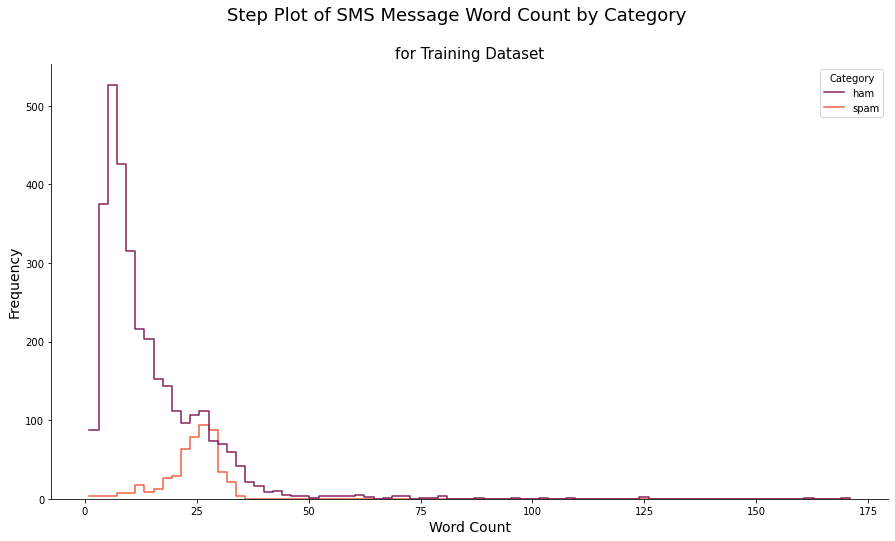

In [18]:
# set figure size
plt.figure(figsize=(15, 8))

# create hist plot
sns.histplot(data=train, x="num_words", hue='Category', element="step", fill=False, palette="rocket")

# add title and axis labels
plt.suptitle("Step Plot of SMS Message Word Count by Category", size=18)
plt.title("for Training Dataset", size=15)
plt.ylabel("Frequency", size=14)
plt.xlabel("Word Count", size=14)

# remove top/right border
sns.despine()

# display plot
plt.show()

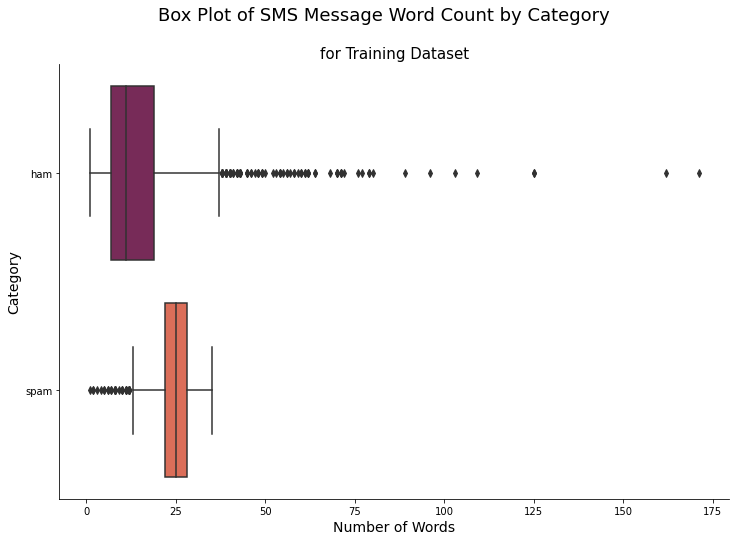

In [19]:
# set figure size
plt.figure(figsize=(12, 8))

# create box plot
sns.boxplot( x=train["num_words"], y=train["Category"], palette="rocket" );

# add title and axis labels
plt.suptitle("Box Plot of SMS Message Word Count by Category", size=18)
plt.title("for Training Dataset", size=15)
plt.xlabel("Number of Words", size=14)
plt.ylabel("Category", size=14)

# remove top/right border
sns.despine()

# display plot
plt.show()

### Word Frequencies

In [20]:
# separate ham & spam into 2 data frames
ham_train = train[train.Category=='ham']
spam_train = train[train.Category=='spam']

In [21]:
# create lists of messages
ham_text = ham_train.Message.tolist() 
spam_text = spam_train.Message.tolist() 

In [22]:
# join the lists and convert words to lower case
ham_text = ' '.join(ham_text).lower()
spam_text = ' '.join(spam_text).lower()

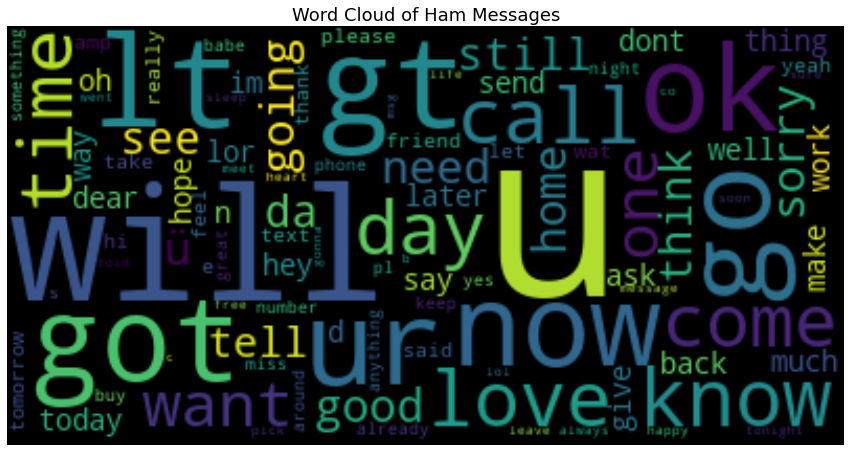

In [23]:
# set figure size
plt.figure(figsize=(15, 12))

# create the ham wordcloud object, ignore stop words
ham_cloud = WordCloud(stopwords = STOPWORDS,
                      max_words = 100,
                      collocations=True).generate(ham_text)

# plot the wordcloud object
plt.title("Word Cloud of Ham Messages", size=18)
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

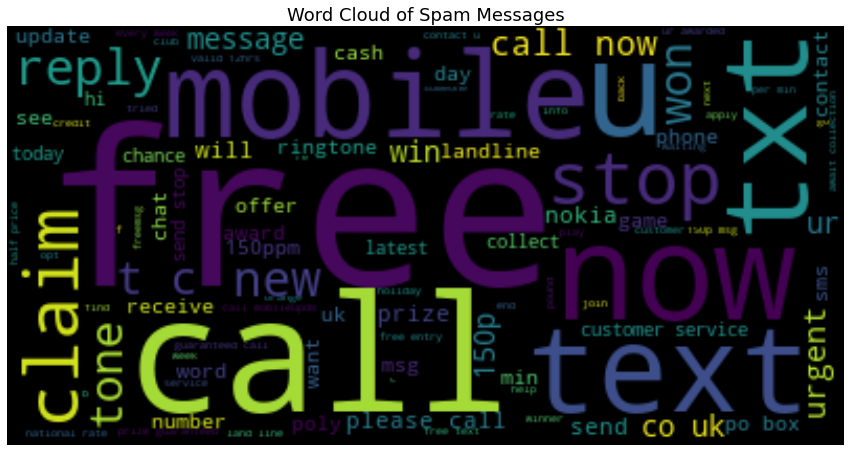

In [24]:
# set figure size
plt.figure(figsize=(15, 12))

# create the ham wordcloud object
spam_cloud = WordCloud(stopwords = STOPWORDS,
                      max_words = 100,
                      collocations=True).generate(spam_text)

# plot the wordcloud object
plt.title("Word Cloud of Spam Messages", size=18)
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Selection

#### Encode Labels

In [25]:
# create label encoder
le=LabelEncoder()

# encode training data Category
train['Category_Encoded']=le.fit_transform(train['Category'])

# encode test data Category
test['Category_Encoded']=le.fit_transform(test['Category'])

# view encoded training data
train.head(n=10)

,Category,Message,num_chars,num_words,Category_Encoded
3235,ham,Yup ü not comin :-(,19,5,0
945,ham,I sent my scores to sophas and i had to do sec...,221,43,0
5319,ham,Kothi print out marandratha.,28,4,0
5528,ham,Its just the effect of irritation. Just ignore it,49,9,0
247,ham,I asked you to call him now ok,30,8,0
3986,ham,"Whatever, juliana. Do whatever you want.",40,6,0
360,ham,"Hello! Just got here, st andrews-boy its a lon...",85,17,0
5347,ham,No sir. That's why i had an 8-hr trip on the b...,133,27,0
3781,ham,Then ur physics get a-?,23,5,0
5188,ham,Okie,4,1,0


#### Clean, Tokenize, & Lemmatize Data

In [26]:
# create function to remove non-alphanumeric tokens
def remove_non_alpha(tokens):
    alphanum = []
    for token in tokens:
        if str.isalpha(token):
            alphanum.append(token)
    return alphanum

In [27]:
# create function to remove stop words
def remove_stop_words(tokens):
    stop_removed = []
    for token in tokens:
        if token not in STOPWORDS:
            stop_removed.append(token)
    return stop_removed

In [28]:
# create function to lemmatize the tokens
def tok_lemmatizer(tokens):
    
    # Initialize the lemmatizer
    lem = WordNetLemmatizer()
    
    # create the list to store lemmas
    lemmas = []
    
    #lemmatize each token & append
    for token in tokens:
            lemmas.append(lem.lemmatize(token))
    return " ".join(lemmas)
    return lemmas

In [29]:
def pre_process(df):
    # convert to lower case
    clean_msg = df['Message'].str.lower()
    
    # tokenize words
    tok = clean_msg.apply(word_tokenize)
    
    # remove non-alphanumeric characters
    tok = tok.apply(remove_non_alpha)
    
    # remove stopwords
    tok = tok.apply(remove_stop_words)
    
    # display the message tokens
    print("\n\n=====Message Tokens Cleaned:=====")
    print(tok)
    print("\n")
    
    # lemmatize the tokens
    lemmas = tok.apply(tok_lemmatizer)
    
    # display the lemmatized tokens
    print("\n\n=====Message Tokens Lemmatized:=====")
    print(lemmas)
    print("\n")
    
    return lemmas
    

In [30]:
# apply pre-processor to the training data
train_lems = pre_process(train)



=====Message Tokens Cleaned:=====
3235                                      [yup, ü, comin]
945     [sent, scores, sophas, secondary, application,...
5319                          [kothi, print, marandratha]
5528                         [effect, irritation, ignore]
247                                [asked, call, now, ok]
                              ...                        
3772    [hi, wlcome, back, wonder, got, eaten, lion, s...
5191                                 [sorry, call, later]
5226            [prabha, soryda, realy, frm, heart, sory]
5390                        [nt, joking, seriously, told]
860                         [say, somebody, named, tampa]
Name: Message, Length: 3733, dtype: object




=====Message Tokens Lemmatized:=====
3235                                          yup ü comin
945     sent score sophas secondary application school...
5319                              kothi print marandratha
5528                             effect irritation ignore
247       

In [31]:
# add cleaned messages to the training data frame
train['Clean_Message'] = train_lems

train.head()

,Category,Message,num_chars,num_words,Category_Encoded,Clean_Message
3235,ham,Yup ü not comin :-(,19,5,0,yup ü comin
945,ham,I sent my scores to sophas and i had to do sec...,221,43,0,sent score sophas secondary application school...
5319,ham,Kothi print out marandratha.,28,4,0,kothi print marandratha
5528,ham,Its just the effect of irritation. Just ignore it,49,9,0,effect irritation ignore
247,ham,I asked you to call him now ok,30,8,0,asked call now ok


In [32]:
# apply pre-processor to the test data
test_lems = pre_process(test)



=====Message Tokens Cleaned:=====
3245    [squeeeeeze, christmas, hug, u, lik, frndshp, ...
944     [sorta, blown, couple, times, recently, id, ra...
1044    [mmm, thats, better, now, got, roast, b, bette...
2484          [mm, kanji, dont, eat, anything, heavy, ok]
812     [ring, comes, guys, costumes, gift, future, yo...
                              ...                        
4944    [check, mailed, varma, kept, copy, regarding, ...
3313                           [know, serving, mean, now]
3652                [want, send, virtual, hug, need, one]
14                                   [date, sunday, will]
4758    [hey, looks, wrong, one, kappa, guys, numbers,...
Name: Message, Length: 1839, dtype: object




=====Message Tokens Lemmatized:=====
3245    squeeeeeze christmas hug u lik frndshp den hug...
944     sorta blown couple time recently id rather tex...
1044    mmm thats better now got roast b better drink ...
2484                  mm kanji dont eat anything heavy ok
812     ri

In [33]:
# add cleaned messages to the test data frame
test['Clean_Message'] = test_lems

test.head()

,Category,Message,num_chars,Category_Encoded,Clean_Message
3245,ham,Squeeeeeze!! This is christmas hug.. If u lik ...,147,0,squeeeeeze christmas hug u lik frndshp den hug...
944,ham,And also I've sorta blown him off a couple tim...,116,0,sorta blown couple time recently id rather tex...
1044,ham,Mmm thats better now i got a roast down me! i...,102,0,mmm thats better now got roast b better drink ...
2484,ham,Mm have some kanji dont eat anything heavy ok,45,0,mm kanji dont eat anything heavy ok
812,ham,So there's a ring that comes with the guys cos...,112,0,ring come guy costume gift future yowifes hint...


#### Split Independent & Dependent Variables

In [34]:

X_train=pd.DataFrame(train,columns=['Clean_Message'])
X_test=pd.DataFrame(test,columns=['Clean_Message'])
y_train = train['Category_Encoded']
y_test = test['Category_Encoded']

In [35]:
print("X_train:")
X_train

X_train:


,Clean_Message
3235,yup ü comin
945,sent score sophas secondary application school...
5319,kothi print marandratha
5528,effect irritation ignore
247,asked call now ok
...,...
3772,hi wlcome back wonder got eaten lion something...
5191,sorry call later
5226,prabha soryda realy frm heart sory
5390,nt joking seriously told


In [36]:
print("y_train:")
y_train

y_train:


3235    0
945     0
5319    0
5528    0
247     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Category_Encoded, Length: 3733, dtype: int32

#### Count Vectorization

In [37]:
cv=CountVectorizer(max_features=2500)
X_train=cv.fit_transform(X_train['Clean_Message']).toarray()
X_test=cv.transform(X_test['Clean_Message']).toarray()

In [38]:
print("X_train after Count Vectorization:")
X_train

X_train after Count Vectorization:


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Model Training & Testing

#### Random Forest

In [39]:
# create random forest classifier
ramdom_forest=RandomForestClassifier(random_state=seed).fit(X_train,y_train)

In [40]:
# make predictions on test data
random_forest_pred=ramdom_forest.predict(X_test)

#### Naive Bayes

In [41]:
# create naive bayes classifier
naive_bayes=MultinomialNB().fit(X_train,y_train)

In [42]:
# make predictions on test data
naive_bayes_pred=naive_bayes.predict(X_test)

#### Logistic Regression

In [43]:
# create logistic regression classifier
logreg=LogisticRegression(random_state=seed).fit(X_train,y_train)

In [44]:
# make predictions on test data
logreg_pred=logreg.predict(X_test)

#### SVM

In [45]:
# create SVM classifier
support_vector_machine=svm.SVC(random_state=seed).fit(X_train,y_train)

In [46]:
# make predictions on test data
support_vector_machine_pred=support_vector_machine.predict(X_test)

#### Decision Tree

In [47]:
# create Decision Tree classifier
decision_tree=tree.DecisionTreeClassifier(random_state=seed).fit(X_train,y_train)

In [48]:
# make predictions on test data
decision_tree_pred=decision_tree.predict(X_test)

## Model Evaluation

#### Random Forest

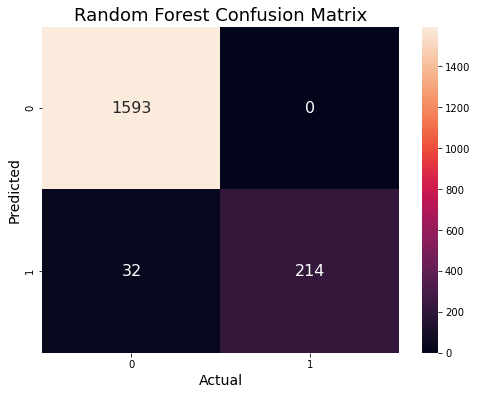

In [49]:
# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
random_forest_conf=confusion_matrix(y_test,random_forest_pred)
sns.heatmap(random_forest_conf,cmap="rocket",annot=True,fmt='d',annot_kws={"fontsize":16})

# add title and axis labels
plt.title("Random Forest Confusion Matrix", size=18)
plt.xlabel("Actual", size=14)
plt.ylabel("Predicted", size=14)

plt.show()

In [50]:
# calculate precision
random_forest_precision = precision_score(y_test, random_forest_pred, average='binary')
print("Precision Score:", random_forest_precision)

# calculate recall
random_forest_recall = recall_score(y_test, random_forest_pred, average='binary')
print("Recall Score:", random_forest_recall)

# calculate f1 score
random_forest_f1 = f1_score(y_test, random_forest_pred, average='binary')
print("F1 Score:", random_forest_f1)

Precision Score: 1.0
Recall Score: 0.8699186991869918
F1 Score: 0.9304347826086956


#### Naive Bayes

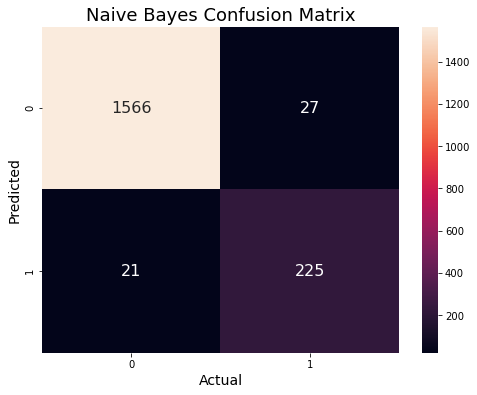

In [51]:
# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
naive_bayes_conf=confusion_matrix(y_test,naive_bayes_pred)
sns.heatmap(naive_bayes_conf,cmap="rocket",annot=True,fmt='d',annot_kws={"fontsize":16})

# add title and axis labels
plt.title("Naive Bayes Confusion Matrix", size=18)
plt.xlabel("Actual", size=14)
plt.ylabel("Predicted", size=14)

plt.show()

In [52]:
# calculate precision
naive_bayes_precision = precision_score(y_test, naive_bayes_pred, average='binary')
print("Precision Score:", naive_bayes_precision)

# calculate recall
naive_bayes_recall = recall_score(y_test, naive_bayes_pred, average='binary')
print("Recall Score:", naive_bayes_recall)

# calculate F1 score
naive_bayes_f1 = f1_score(y_test, naive_bayes_pred, average='binary')
print("F1 Score:", naive_bayes_f1)

Precision Score: 0.8928571428571429
Recall Score: 0.9146341463414634
F1 Score: 0.9036144578313253


#### Logistic Regression

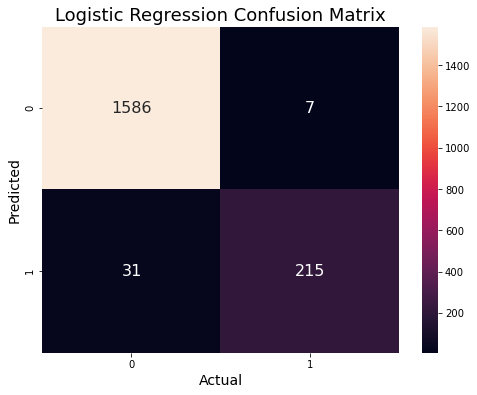

In [53]:
# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
logreg_conf=confusion_matrix(y_test,logreg_pred)
sns.heatmap(logreg_conf,cmap="rocket",annot=True,fmt='d',annot_kws={"fontsize":16})

# add title and axis labels
plt.title("Logistic Regression Confusion Matrix", size=18)
plt.xlabel("Actual", size=14)
plt.ylabel("Predicted", size=14)

plt.show()

In [54]:
# calculate precision
logreg_precision = precision_score(y_test, logreg_pred, average='binary')
print("Precision Score:", logreg_precision)

# calculate recall
logreg_recall = recall_score(y_test, logreg_pred, average='binary')
print("Recall Score:", logreg_recall)

# calculate F1 score
logreg_f1 = f1_score(y_test, logreg_pred, average='binary')
print("F1 Score:", logreg_f1)

Precision Score: 0.9684684684684685
Recall Score: 0.8739837398373984
F1 Score: 0.9188034188034189


#### SVM

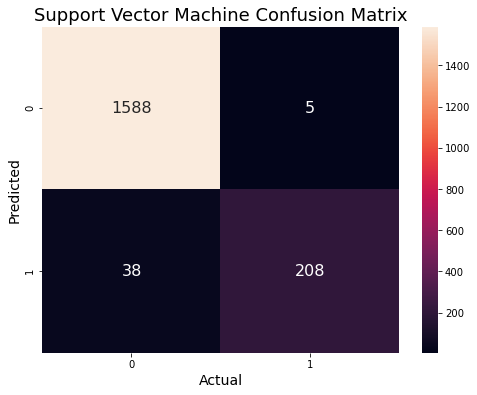

In [55]:
# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
support_vector_machine_conf=confusion_matrix(y_test,support_vector_machine_pred)
sns.heatmap(support_vector_machine_conf,cmap="rocket",annot=True,fmt='d',annot_kws={"fontsize":16})

# add title and axis labels
plt.title("Support Vector Machine Confusion Matrix", size=18)
plt.xlabel("Actual", size=14)
plt.ylabel("Predicted", size=14)

plt.show()

In [56]:
# calculate precision
support_vector_machine_precision = precision_score(y_test, support_vector_machine_pred, average='binary')
print("Precision Score:", support_vector_machine_precision)

# calculate recall
support_vector_machine_recall = recall_score(y_test, support_vector_machine_pred, average='binary')
print("Recall Score:", support_vector_machine_recall)

# calculate F1 score
support_vector_machine_f1 = f1_score(y_test, support_vector_machine_pred, average='binary')
print("F1 Score:", support_vector_machine_f1)

Precision Score: 0.9765258215962441
Recall Score: 0.8455284552845529
F1 Score: 0.9063180827886711


#### Decision Tree

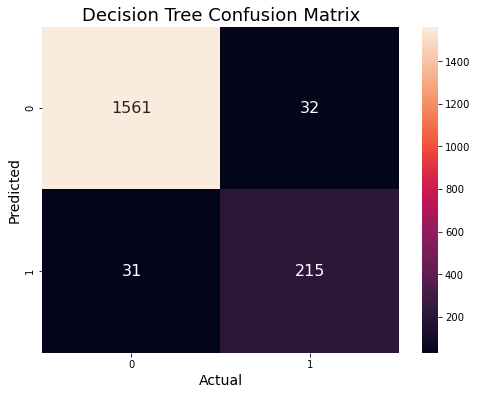

In [57]:
# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
decision_tree_conf=confusion_matrix(y_test,decision_tree_pred)
sns.heatmap(decision_tree_conf,cmap="rocket",annot=True,fmt='d',annot_kws={"fontsize":16})

# add title and axis labels
plt.title("Decision Tree Confusion Matrix", size=18)
plt.xlabel("Actual", size=14)
plt.ylabel("Predicted", size=14)

plt.show()

In [58]:
# calculate precision
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='binary')
print("Precision Score:", decision_tree_precision)

# calculate recall
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='binary')
print("Recall Score:", decision_tree_recall)

# calculate recall
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='binary')
print("F1 Score:", decision_tree_f1)

Precision Score: 0.8704453441295547
Recall Score: 0.8739837398373984
F1 Score: 0.8722109533468559


#### Summarize Evaluation Metrics

In [59]:
# list evaluation metric data
eval_df = [['Random Forest', random_forest_precision, random_forest_recall, random_forest_f1], 
           ['Naive Bayes', naive_bayes_precision, naive_bayes_recall, naive_bayes_f1], 
           ['Logistic Regression', logreg_precision, logreg_recall, logreg_f1],
           ['SVM', support_vector_machine_precision, support_vector_machine_recall, support_vector_machine_f1],
           ['Decision Tree', decision_tree_precision, decision_tree_recall, decision_tree_f1]
          ]
 
# create dataFrame from evaluation metrics
df = pd.DataFrame(eval_df, columns = ['Classifier', 'Precision Score', 'Recall Score', 'F1 Score'])
 
# print dataframe
df.sort_values(by='Precision Score', ascending=False)

,Classifier,Precision Score,Recall Score,F1 Score
0,Random Forest,1.000000,0.869919,0.930435
3,SVM,0.976526,0.845528,0.906318
2,Logistic Regression,0.968468,0.873984,0.918803
1,Naive Bayes,0.892857,0.914634,0.903614
4,Decision Tree,0.870445,0.873984,0.872211
